# Actividad 5 (Extracción de Características)
## Luis Javier González Romero - A01702728

In [1]:
#%pip install funpymodeling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [3]:
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx')
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


## Valores nulos

In [4]:
Micro_Retailer.isnull().sum()

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [5]:
Micro_Retailer.isnull().sum().sum()

9846

In [6]:
Micro_Retailer = Micro_Retailer.fillna(Micro_Retailer.mode().iloc[0])

In [7]:
Micro_Retailer.isnull().sum()

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

In [8]:
Micro_Retailer.isnull().sum().sum()

684

In [9]:
Micro_Retailer[Micro_Retailer.columns[[41,43,44,45]]] = Micro_Retailer[Micro_Retailer.columns[[41,43,44,45]]].fillna(0)

In [10]:
Micro_Retailer.isnull().sum().sum()

0

In [11]:
data2 = Micro_Retailer[Micro_Retailer.columns[[5,6,13,14,16,21,22,29,31,33,41,42,43,44,45,49,51,56,57,58,59,60,78,90,104]]]
data2

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2,0.0,4,2.0,2.0,0.0,3.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
1,19.053561,-98.234142,0,4.0,8,1.0,1.0,0.0,4.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,60.0,222230377.0
2,19.058655,-98.232300,0,0.0,24,2.0,2.0,0.0,0.0,7.0,...,10.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,60.0,222230377.0
3,19.059293,-98.233158,0,0.0,2,1.0,1.0,0.0,4.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
4,19.059585,-98.233864,0,0.0,16,0.0,0.0,0.0,0.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1,0.0,5,1.0,0.0,0.0,1.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
167,19.042794,-98.193802,1,5.0,5,1.0,0.0,0.0,1.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
168,19.042809,-98.193439,3,1.0,1,1.0,0.0,0.0,1.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
169,19.042558,-98.193818,0,1.0,1,1.0,0.0,0.0,1.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0


## Outliers

In [12]:
y = data2
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Límite superior permitido', Limite_Superior_iqr)
print('Límite inferior permitido', Limite_Inferior_iqr)

Límite superior permitido _latitude                                            1.913877e+01
_longitude                                          -9.807532e+01
97_number_of_customers_in_store                      5.000000e+00
268_number_fridges                                   5.000000e+00
104_how_many_shelves_does_the_micro_retailer_have    1.600000e+01
2_current_permanent_employees                        3.500000e+00
4_number_permanent_employees_last_year               2.500000e+00
103_number_own_fridges                               0.000000e+00
145_number_direct_competitors                        7.250000e+00
24_burnout                                           7.000000e+00
271_card_fee                                         0.000000e+00
272_card_days_receive_money                          1.000000e+00
273_platform_extra_charge                            0.000000e+00
274_platform_fee                                     0.000000e+00
275_platform_days_receive_money                   

In [13]:
data3_iqr = data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,0.0,3.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,0.0,4.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,NaN,222230377.0
2,19.058655,-98.232300,0.0,0.0,NaN,2.0,2.0,0.0,0.0,7.0,...,NaN,0.0,7.0,7.0,2.0,0.0,1.0,1.0,NaN,222230377.0
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,0.0,4.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,0.0,0.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,1.0,0.0,0.0,1.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
167,19.042794,-98.193802,1.0,5.0,5.0,1.0,0.0,0.0,1.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
168,19.042809,-98.193439,3.0,1.0,1.0,1.0,0.0,0.0,1.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0
169,19.042558,-98.193818,0.0,1.0,1.0,1.0,0.0,0.0,1.0,7.0,...,15.0,0.0,7.0,7.0,2.0,0.0,1.0,1.0,0.0,222230377.0


In [14]:
data4_iqr = data3_iqr.drop(data2.columns[[0,1,2,3,4,5,6,7,17,18,19]], axis = 1)
data4_iqr

,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,3.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
1,4.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,NaN,222230377.0
2,0.0,7.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,NaN,222230377.0
3,4.0,7.0,0.0,NaN,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
4,0.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
167,1.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
168,1.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
169,1.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0


In [15]:
valores_nulos = data4_iqr.isnull().sum()
valores_nulos

145_number_direct_competitors          10
24_burnout                             27
271_card_fee                            0
272_card_days_receive_money            14
273_platform_extra_charge               0
274_platform_fee                        0
275_platform_days_receive_money         0
276_expected_days_informal_credit      17
36_credit_default_rate                  9
62_frequency_only_services             17
78_number_home_deliveries_week          1
172_supplier_frequency                 22
163_number_high_perishable_products    42
236_whatsapp                           41
dtype: int64

In [16]:
data5_iqr = data4_iqr.copy()
data5_iqr = data5_iqr.fillna(round(data4_iqr.mean(), 1))
data5_iqr

,145_number_direct_competitors,24_burnout,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,3.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
1,4.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
2,0.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
3,4.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
4,0.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
167,1.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
168,1.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
169,1.0,7.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0


In [17]:
valores_nulos = data5_iqr.isnull().sum()
valores_nulos

145_number_direct_competitors          0
24_burnout                             0
271_card_fee                           0
272_card_days_receive_money            0
273_platform_extra_charge              0
274_platform_fee                       0
275_platform_days_receive_money        0
276_expected_days_informal_credit      0
36_credit_default_rate                 0
62_frequency_only_services             0
78_number_home_deliveries_week         0
172_supplier_frequency                 0
163_number_high_perishable_products    0
236_whatsapp                           0
dtype: int64

In [18]:
Datos_limpios = pd.concat([Micro_Retailer, data5_iqr], axis = 1)
Datos_limpios

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,-98.193802,Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),...,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,0.0,0.0,0.0,15.0,0.0,0.0,1.0,1.0,0.0,222230377.0


## Extracción de Características

In [19]:
freq_tbl(Datos_limpios)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

  59_willingness_share_sales_data_mse_better_prices  frequency  percentage  \
0                          Totalmente en desacuerdo        135    0.789474   
1                             Totalmente de acuerdo         15    0.087719   
2                                   Algo de acuerdo         11    0.064327   
3                    Ni de acuerdo ni en desacuerdo          5    0.029240   
4                                Algo en desacuerdo          5    0.029240   

   cumulative_perc  
0         0.789474  
1         0.877193  
2         0.941520  
3         0.970760  
4         1.000000  

----------------------------------------------------------------

                           185_place_orders_suppliers  frequency  percentage  \
0                                          En persona        120    0.701754   
1              Mensajería instantánea (e.g. WhatsApp)          8    0.046784   
2   En persona,Llamada telefónica,Mensajería insta...          7    0.040936   
3                 

,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
...,...,...,...,...
59,joyeria,1,0.005848,0.976608
60,dulceria,1,0.005848,0.982456
61,Ropa,1,0.005848,0.988304
62,Ferretería,1,0.005848,0.994152


,232_type_of_store,frequency,percentage,cumulative_perc
0,Grocery store (aka. nanostore),52,0.304094,0.304094
1,Micro-restaurant (aka. fondita),31,0.181287,0.485380
2,Dairy products,10,0.058480,0.543860
3,Cafeteria,6,0.035088,0.578947
4,Butcher shop,6,0.035088,0.614035
5,Produce (fruits & vegetables),4,0.023392,0.637427
6,Handmade products,2,0.011696,0.649123
7,Papelería,2,0.011696,0.660819
8,objetos,2,0.011696,0.672515
9,Ferretería,2,0.011696,0.684211


,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427
Handmade products,2,0.011696,0.649123
Papelería,2,0.011696,0.660819
objetos,2,0.011696,0.672515


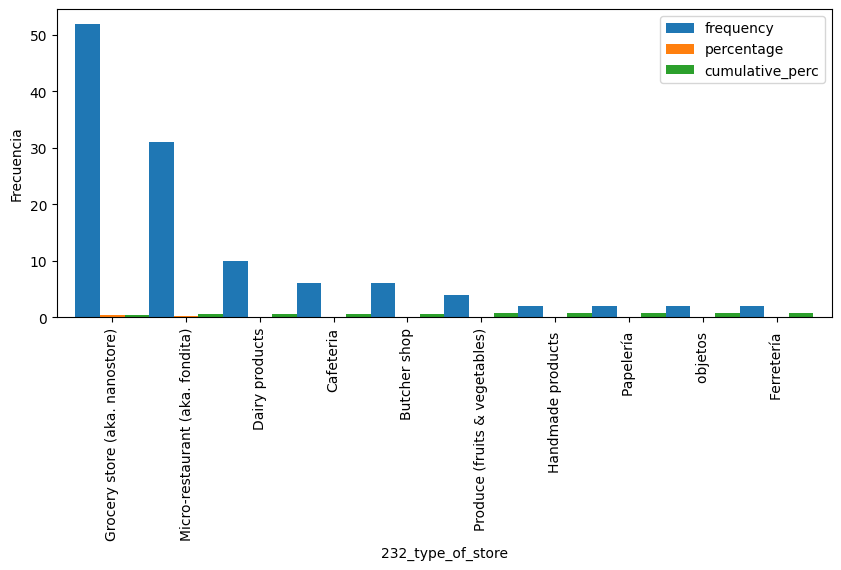

,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,54,0.315789,0.315789
1,Analog cash register,16,0.093567,0.409357
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.461988
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.514620
4,"Analog cash register,Smartphone",8,0.046784,0.561404
5,"Security cameras,Smartphone",7,0.040936,0.602339
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.631579
7,Security cameras,5,0.029240,0.660819
8,Dataphone (i.e. card payments),4,0.023392,0.684211
9,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.707602


,184_store_devices,frequency,percentage,cumulative_perc
0,Smartphone,54,0.315789,0.315789
1,Analog cash register,16,0.093567,0.409357
2,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.461988
3,POS system (i.e. computer + bar code scanner +...,9,0.052632,0.514620
4,"Analog cash register,Smartphone",8,0.046784,0.561404
5,"Security cameras,Smartphone",7,0.040936,0.602339
6,"Dataphone (i.e. card payments),Security camera...",5,0.029240,0.631579
7,Security cameras,5,0.029240,0.660819
8,Dataphone (i.e. card payments),4,0.023392,0.684211
9,POS system (i.e. computer + bar code scanner +...,4,0.023392,0.707602


,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,54,0.315789,0.315789
Analog cash register,16,0.093567,0.409357
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.461988
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.514620
"Analog cash register,Smartphone",8,0.046784,0.561404
"Security cameras,Smartphone",7,0.040936,0.602339
"Dataphone (i.e. card payments),Security cameras,Smartphone",5,0.029240,0.631579
Security cameras,5,0.029240,0.660819
Dataphone (i.e. card payments),4,0.023392,0.684211


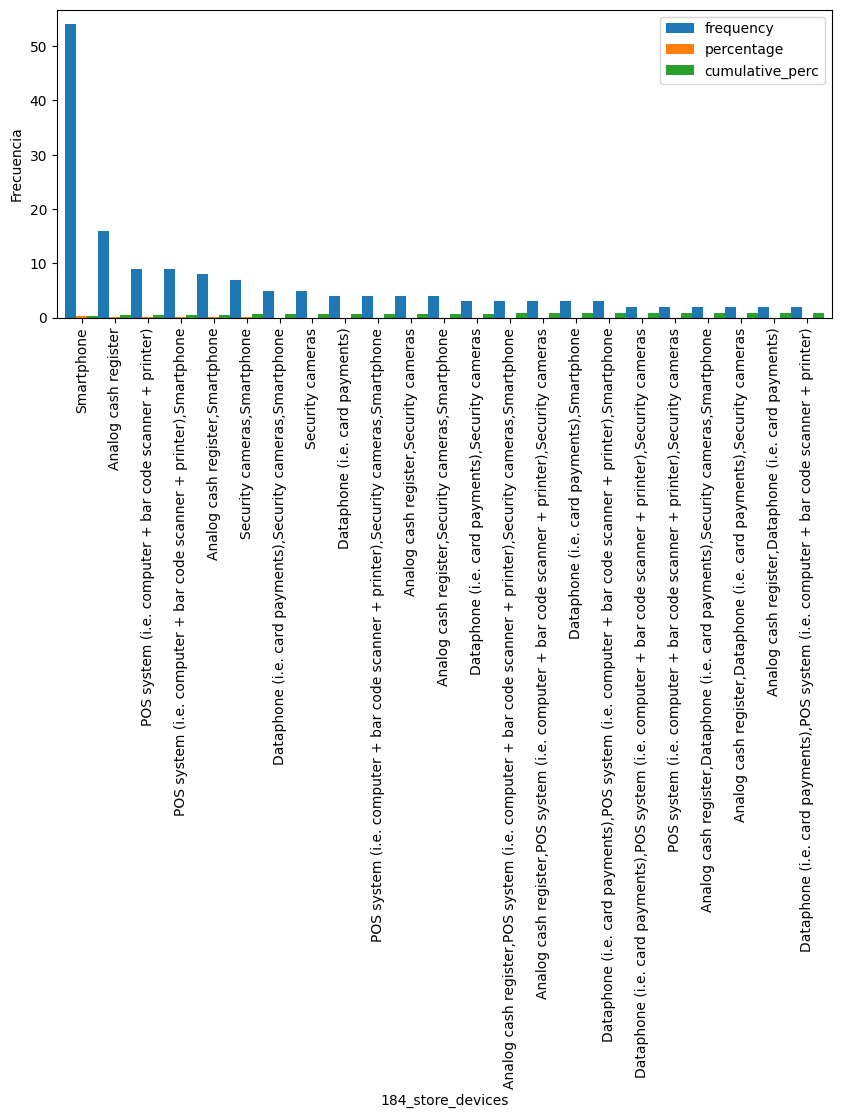

,5_change_store_space_last_year,frequency,percentage,cumulative_perc
0,No cambió,144,0.842105,0.842105
1,Disminuyó 15%,9,0.052632,0.894737
2,Aumentó 25%,7,0.040936,0.935673
3,Aumentó 15%,4,0.023392,0.959064
4,Aumentó 50% o más,4,0.023392,0.982456
5,Disminuyó 25%,2,0.011696,0.994152
6,Disminuyó 50% o más,1,0.005848,1.000000


,5_change_store_space_last_year,frequency,percentage,cumulative_perc
0,No cambió,144,0.842105,0.842105
1,Disminuyó 15%,9,0.052632,0.894737
2,Aumentó 25%,7,0.040936,0.935673
3,Aumentó 15%,4,0.023392,0.959064
4,Aumentó 50% o más,4,0.023392,0.982456
5,Disminuyó 25%,2,0.011696,0.994152


,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,144,0.842105,0.842105
Disminuyó 15%,9,0.052632,0.894737
Aumentó 25%,7,0.040936,0.935673
Aumentó 15%,4,0.023392,0.959064
Aumentó 50% o más,4,0.023392,0.982456
Disminuyó 25%,2,0.011696,0.994152


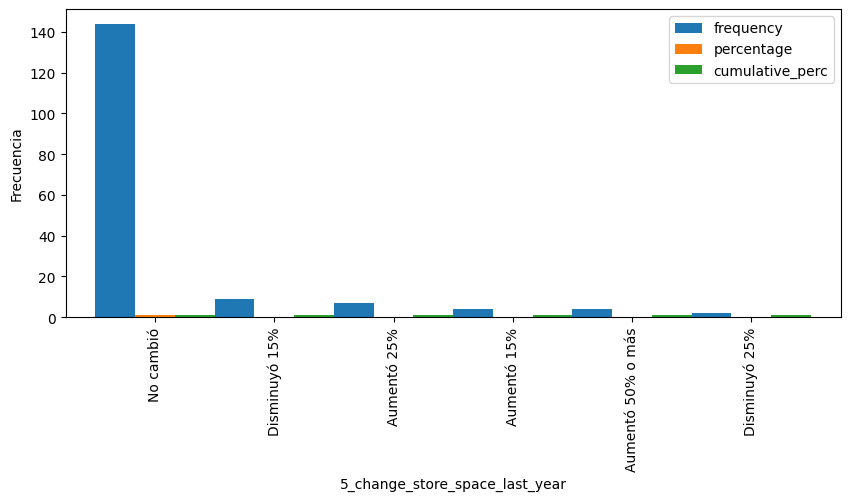

,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,No cambió,136,0.795322,0.795322
1,Aumentó 15%,14,0.081871,0.877193
2,Disminuyó 15%,5,0.029240,0.906433
3,Aumentó 25%,4,0.023392,0.929825
4,Aumentó 50% o más,4,0.023392,0.953216
5,Disminuyó 25%,3,0.017544,0.970760
6,Dependiente,1,0.005848,0.976608
7,Disminuyó 50% o más,1,0.005848,0.982456
8,0,1,0.005848,0.988304
9,No hay empleándosela,1,0.005848,0.994152


,6_change_employees_average_salary_last_year,frequency,percentage,cumulative_perc
0,No cambió,136,0.795322,0.795322
1,Aumentó 15%,14,0.081871,0.877193
2,Disminuyó 15%,5,0.029240,0.906433
3,Aumentó 25%,4,0.023392,0.929825
4,Aumentó 50% o más,4,0.023392,0.953216
5,Disminuyó 25%,3,0.017544,0.970760


,frequency,percentage,cumulative_perc
6_change_employees_average_salary_last_year,,,
No cambió,136,0.795322,0.795322
Aumentó 15%,14,0.081871,0.877193
Disminuyó 15%,5,0.029240,0.906433
Aumentó 25%,4,0.023392,0.929825
Aumentó 50% o más,4,0.023392,0.953216
Disminuyó 25%,3,0.017544,0.970760


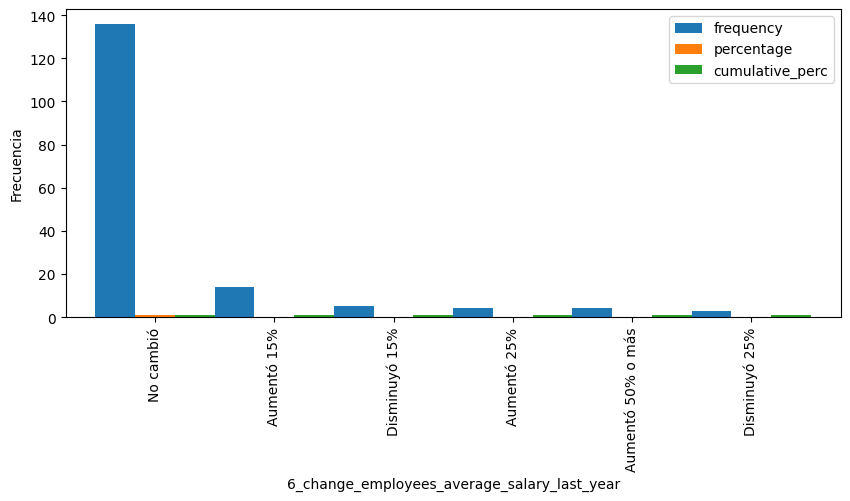

,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,101,0.590643,0.590643
1,Software especializado + computadora,21,0.122807,0.713450
2,En Excel,20,0.116959,0.830409
3,No lo hago,18,0.105263,0.935673
4,"En Excel,En papel",7,0.040936,0.976608
5,Mentalmente,1,0.005848,0.982456
6,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.988304
7,"En papel,Mental",1,0.005848,0.994152
8,"Aplicación móvil (i.e. App) + smartphone,En Excel",1,0.005848,1.000000


,49_inventory_records,frequency,percentage,cumulative_perc
0,En papel,101,0.590643,0.590643
1,Software especializado + computadora,21,0.122807,0.713450
2,En Excel,20,0.116959,0.830409
3,No lo hago,18,0.105263,0.935673
4,"En Excel,En papel",7,0.040936,0.976608


,frequency,percentage,cumulative_perc
49_inventory_records,,,
En papel,101,0.590643,0.590643
Software especializado + computadora,21,0.122807,0.713450
En Excel,20,0.116959,0.830409
No lo hago,18,0.105263,0.935673
"En Excel,En papel",7,0.040936,0.976608


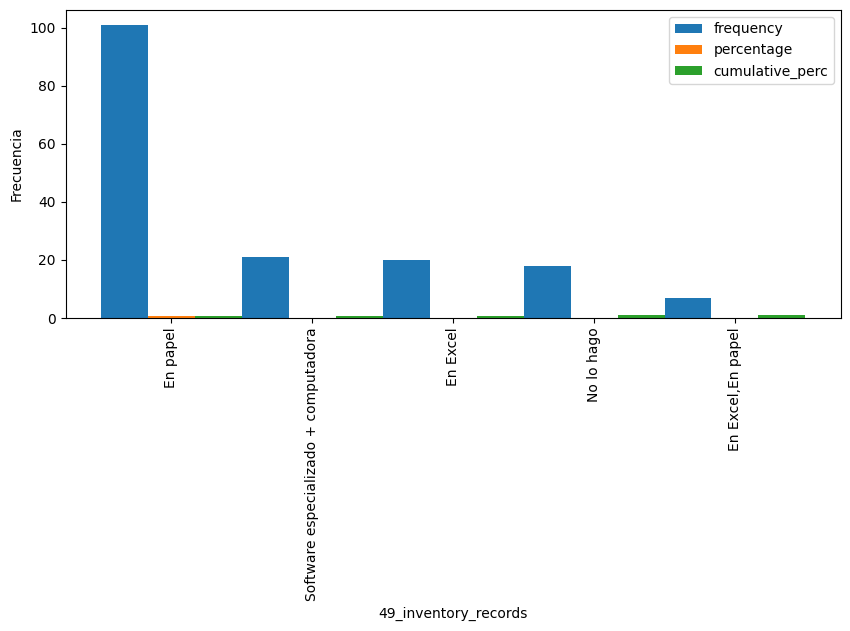

,18_sales_records,frequency,percentage,cumulative_perc
0,En papel,108,0.631579,0.631579
1,Software especializado + computadora,22,0.128655,0.760234
2,No lo hago,14,0.081871,0.842105
3,En Excel,10,0.058480,0.900585
4,Caja registradora (análoga),4,0.023392,0.923977
5,"En Excel,En papel",4,0.023392,0.947368
6,Aplicación móvil (i.e. App) + smartphone,1,0.005848,0.953216
7,"Aplicación móvil (i.e. App) + smartphone,Caja ...",1,0.005848,0.959064
8,Contadora,1,0.005848,0.964912
9,Notas,1,0.005848,0.970760


,18_sales_records,frequency,percentage,cumulative_perc
0,En papel,108,0.631579,0.631579
1,Software especializado + computadora,22,0.128655,0.760234
2,No lo hago,14,0.081871,0.842105
3,En Excel,10,0.058480,0.900585
4,Caja registradora (análoga),4,0.023392,0.923977
5,"En Excel,En papel",4,0.023392,0.947368


,frequency,percentage,cumulative_perc
18_sales_records,,,
En papel,108,0.631579,0.631579
Software especializado + computadora,22,0.128655,0.760234
No lo hago,14,0.081871,0.842105
En Excel,10,0.058480,0.900585
Caja registradora (análoga),4,0.023392,0.923977
"En Excel,En papel",4,0.023392,0.947368


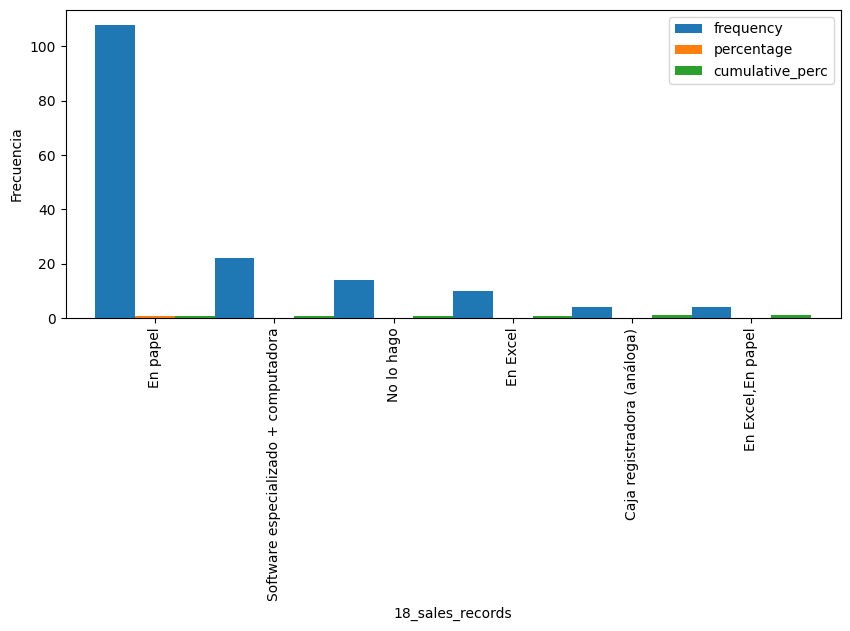

,155_sales_registers_used_for,frequency,percentage,cumulative_perc
0,No los uso,169,0.988304,0.988304
1,Se lleva al día,1,0.005848,0.994152
2,PEPS,1,0.005848,1.000000


,155_sales_registers_used_for,frequency,percentage,cumulative_perc
0,No los uso,169,0.988304,0.988304


,frequency,percentage,cumulative_perc
155_sales_registers_used_for,,,
No los uso,169,0.988304,0.988304


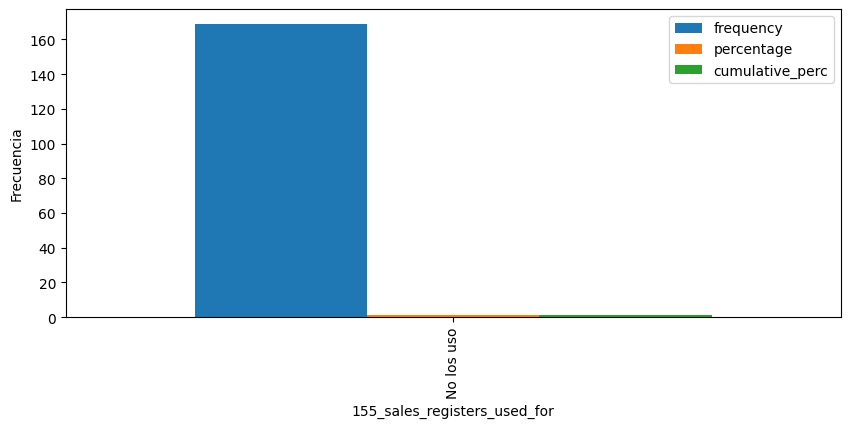

,210_sales_channels,frequency,percentage,cumulative_perc
0,"Redes sociales (e.g. Facebook, Instagram)",100,0.584795,0.584795
1,WhatsApp,10,0.058480,0.643275
2,"Redes sociales (e.g. Facebook, Instagram),What...",9,0.052632,0.695906
3,Llamada a Teléfono fijo,6,0.035088,0.730994
4,"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
5,Llamada a Teléfono celular,5,0.029240,0.795322
6,"Llamada a Teléfono celular,Redes sociales (e.g...",5,0.029240,0.824561
7,"Llamada a Teléfono celular,Llamada a Teléfono ...",3,0.017544,0.842105
8,Ninguno,3,0.017544,0.859649
9,Página web propia,3,0.017544,0.877193


,210_sales_channels,frequency,percentage,cumulative_perc
0,"Redes sociales (e.g. Facebook, Instagram)",100,0.584795,0.584795
1,WhatsApp,10,0.058480,0.643275
2,"Redes sociales (e.g. Facebook, Instagram),What...",9,0.052632,0.695906
3,Llamada a Teléfono fijo,6,0.035088,0.730994
4,"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
5,Llamada a Teléfono celular,5,0.029240,0.795322
6,"Llamada a Teléfono celular,Redes sociales (e.g...",5,0.029240,0.824561
7,"Llamada a Teléfono celular,Llamada a Teléfono ...",3,0.017544,0.842105
8,Ninguno,3,0.017544,0.859649
9,Página web propia,3,0.017544,0.877193


,frequency,percentage,cumulative_perc
210_sales_channels,,,
"Redes sociales (e.g. Facebook, Instagram)",100,0.584795,0.584795
WhatsApp,10,0.058480,0.643275
"Redes sociales (e.g. Facebook, Instagram),WhatsApp",9,0.052632,0.695906
Llamada a Teléfono fijo,6,0.035088,0.730994
"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
Llamada a Teléfono celular,5,0.029240,0.795322
"Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp",5,0.029240,0.824561
"Llamada a Teléfono celular,Llamada a Teléfono fijo,Redes sociales (e.g. Facebook, Instagram),WhatsApp",3,0.017544,0.842105
Ninguno,3,0.017544,0.859649


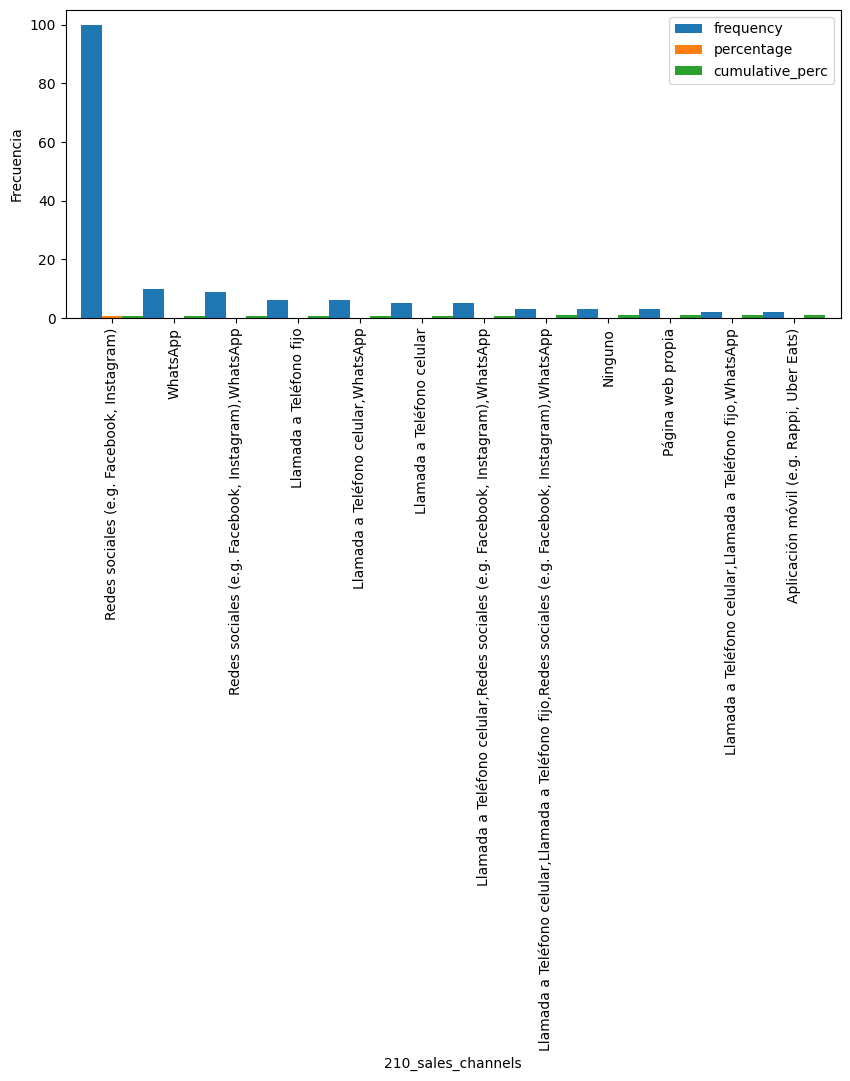

,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,104,0.608187,0.608187
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
2,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
3,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456
4,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.988304
5,"Aplicación móvil (e.g. CODI),Efectivo,Tarjeta ...",1,0.005848,0.994152
6,Tarjeta de débito y/o crédito,1,0.005848,1.000000


,189_payment_methods,frequency,percentage,cumulative_perc
0,Efectivo,104,0.608187,0.608187
1,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",30,0.175439,0.783626
2,"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
3,"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


,frequency,percentage,cumulative_perc
189_payment_methods,,,
Efectivo,104,0.608187,0.608187
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.783626
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


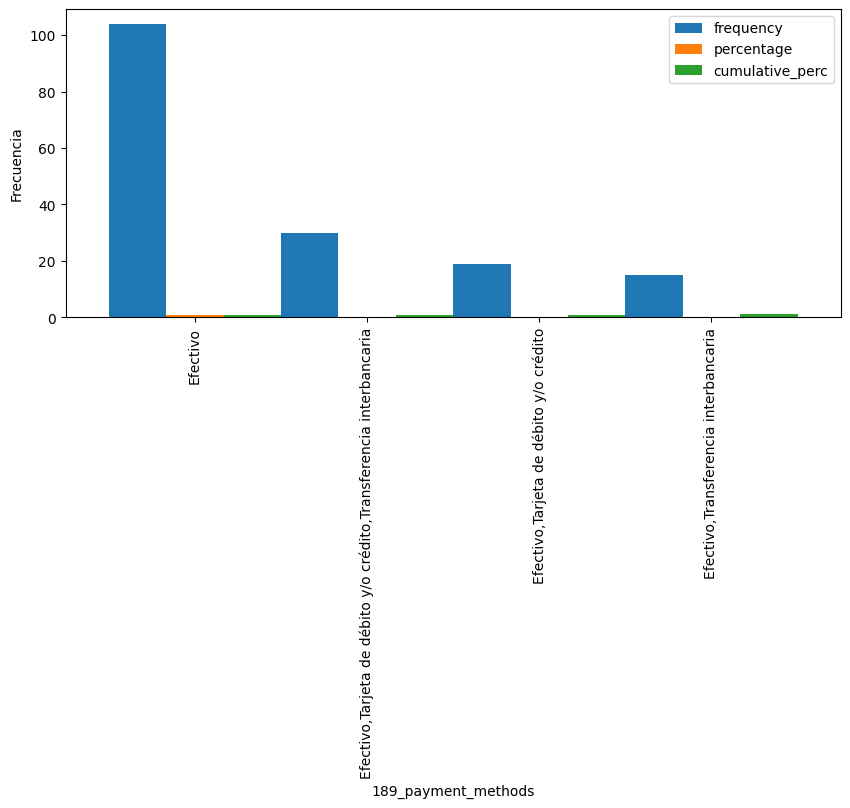

In [20]:
variables = ['232_type_of_store','184_store_devices','5_change_store_space_last_year',
             '6_change_employees_average_salary_last_year','49_inventory_records','18_sales_records',
            '155_sales_registers_used_for','210_sales_channels','189_payment_methods']

cont = 1

for catg in variables:
    
    table1= freq_tbl(Micro_Retailer[catg])
    display(table1)
    Filtro= table1[table1['frequency']>1]
    display(Filtro)
    Filtro_index= Filtro.set_index(catg)
    display(Filtro_index)
    Filtro_index.plot(kind = 'bar', width=1, figsize=(10,4))
    plt.ylabel('Frecuencia')
    plt.show()

,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,103,0.602339,0.602339
1,Aplicación móvil,21,0.122807,0.725146
2,Ninguna,20,0.116959,0.842105
3,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
4,Cuaderno,6,0.035088,0.953216
5,Teléfono,1,0.005848,0.959064
6,"Cuaderno,Redes sociales",1,0.005848,0.964912
7,"Aplicación móvil,De frente",1,0.005848,0.970760
8,Físico,1,0.005848,0.976608
9,"Aplicación móvil,Ninguna",1,0.005848,0.982456


,214_customer_relationship_tools,frequency,percentage,cumulative_perc
0,Redes sociales,103,0.602339,0.602339
1,Aplicación móvil,21,0.122807,0.725146
2,Ninguna,20,0.116959,0.842105
3,"Aplicación móvil,Redes sociales",13,0.076023,0.918129
4,Cuaderno,6,0.035088,0.953216


,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Redes sociales,103,0.602339,0.602339
Aplicación móvil,21,0.122807,0.725146
Ninguna,20,0.116959,0.842105
"Aplicación móvil,Redes sociales",13,0.076023,0.918129
Cuaderno,6,0.035088,0.953216


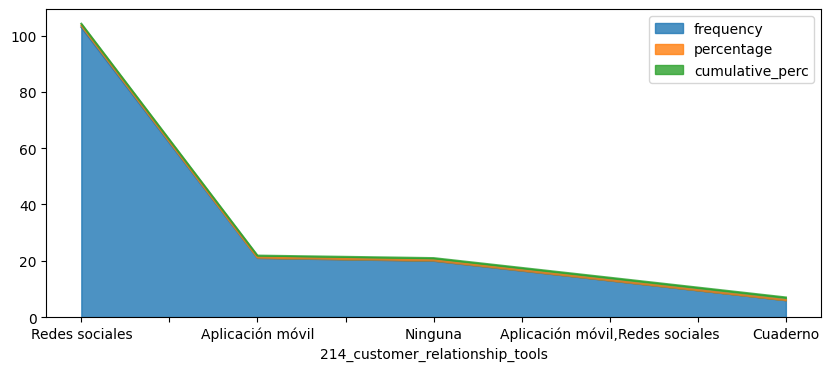

,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,Ninguna,122,0.713450,0.713450
1,Cuaderno,21,0.122807,0.836257
2,Software especializado,6,0.035088,0.871345
3,Excel,6,0.035088,0.906433
4,"Cuaderno,Excel",3,0.017544,0.923977
5,"Cuaderno,Ninguna",2,0.011696,0.935673
6,Other,1,0.005848,0.941520
7,Mental,1,0.005848,0.947368
8,Por temporada de pan,1,0.005848,0.953216
9,Sobre demanda,1,0.005848,0.959064


,193_sales_planning_tools,frequency,percentage,cumulative_perc
0,Ninguna,122,0.713450,0.713450
1,Cuaderno,21,0.122807,0.836257
2,Software especializado,6,0.035088,0.871345
3,Excel,6,0.035088,0.906433
4,"Cuaderno,Excel",3,0.017544,0.923977
5,"Cuaderno,Ninguna",2,0.011696,0.935673


,frequency,percentage,cumulative_perc
193_sales_planning_tools,,,
Ninguna,122,0.713450,0.713450
Cuaderno,21,0.122807,0.836257
Software especializado,6,0.035088,0.871345
Excel,6,0.035088,0.906433
"Cuaderno,Excel",3,0.017544,0.923977
"Cuaderno,Ninguna",2,0.011696,0.935673


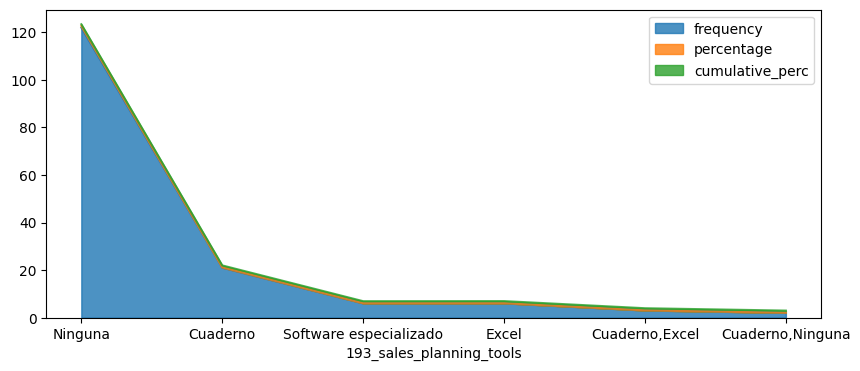

,60_services,frequency,percentage,cumulative_perc
0,Ninguno,138,0.807018,0.807018
1,Entrega a domicilio,15,0.087719,0.894737
2,Recarga telefónica,7,0.040936,0.935673
3,"Entrega a domicilio,Pago de servicios públicos...",2,0.011696,0.947368
4,"Entrega a domicilio,Recarga telefónica",2,0.011696,0.959064
5,Toma de papa nicolau,1,0.005848,0.964912
6,Renta de local,1,0.005848,0.970760
7,venta,1,0.005848,0.976608
8,"Entrega a domicilio,Recarga telefónica,Recepci...",1,0.005848,0.982456
9,"Entrega a domicilio,Pago de servicios públicos...",1,0.005848,0.988304


,60_services,frequency,percentage,cumulative_perc
0,Ninguno,138,0.807018,0.807018
1,Entrega a domicilio,15,0.087719,0.894737
2,Recarga telefónica,7,0.040936,0.935673
3,"Entrega a domicilio,Pago de servicios públicos...",2,0.011696,0.947368
4,"Entrega a domicilio,Recarga telefónica",2,0.011696,0.959064


,frequency,percentage,cumulative_perc
60_services,,,
Ninguno,138,0.807018,0.807018
Entrega a domicilio,15,0.087719,0.894737
Recarga telefónica,7,0.040936,0.935673
"Entrega a domicilio,Pago de servicios públicos (e.g. Yastas),Recarga telefónica",2,0.011696,0.947368
"Entrega a domicilio,Recarga telefónica",2,0.011696,0.959064


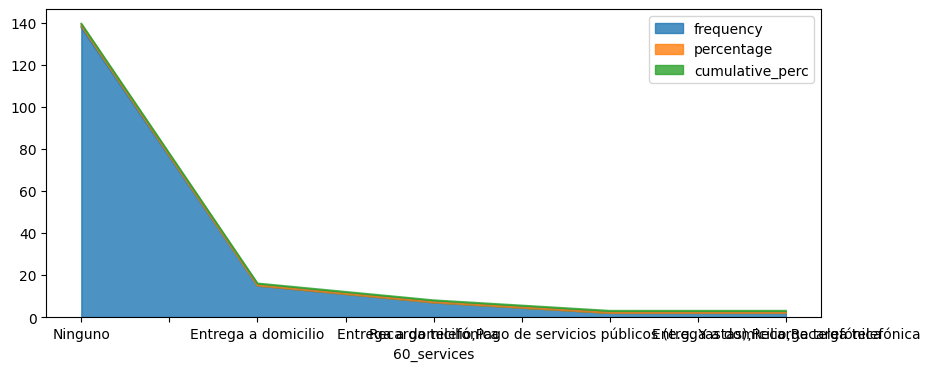

,69_why_not_services,frequency,percentage,cumulative_perc
0,No conozco los servicios,137,0.801170,0.801170
1,No quiero involucrarme con la tecnología,7,0.040936,0.842105
2,No creo que represente grandes ingresos,6,0.035088,0.877193
3,Es muy caro,4,0.023392,0.900585
4,"No conozco los servicios,No quiero involucrarm...",2,0.011696,0.912281
5,no es requerido,1,0.005848,0.918129
6,No sabe cómo involucrarse,1,0.005848,0.923977
7,Se quiere involucrar,1,0.005848,0.929825
8,Se vende ropa,1,0.005848,0.935673
9,"Es muy caro,No conozco los servicios,No creo q...",1,0.005848,0.941520


,69_why_not_services,frequency,percentage,cumulative_perc
0,No conozco los servicios,137,0.801170,0.801170
1,No quiero involucrarme con la tecnología,7,0.040936,0.842105
2,No creo que represente grandes ingresos,6,0.035088,0.877193
3,Es muy caro,4,0.023392,0.900585
4,"No conozco los servicios,No quiero involucrarm...",2,0.011696,0.912281


,frequency,percentage,cumulative_perc
69_why_not_services,,,
No conozco los servicios,137,0.801170,0.801170
No quiero involucrarme con la tecnología,7,0.040936,0.842105
No creo que represente grandes ingresos,6,0.035088,0.877193
Es muy caro,4,0.023392,0.900585
"No conozco los servicios,No quiero involucrarme con la tecnología",2,0.011696,0.912281


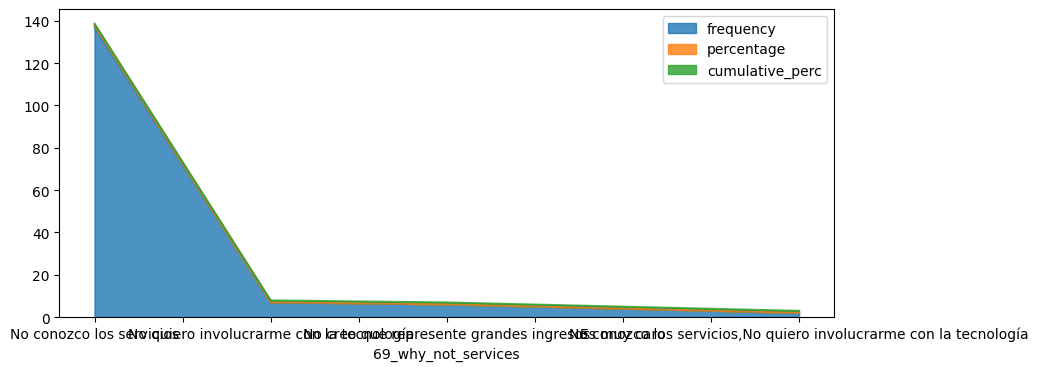

In [21]:
variables = ['214_customer_relationship_tools',
             '193_sales_planning_tools','60_services','69_why_not_services']

cont = 1

for catg in variables:
    
    table1= freq_tbl(Micro_Retailer[catg])
    display(table1)
    Filtro= table1[table1['frequency']>1]
    display(Filtro)
    Filtro_index= Filtro.set_index(catg)
    display(Filtro_index)
    Filtro_index.plot(kind='area', figsize=(10,4),alpha = 0.8)
    plt.show()

,311_topups,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,146,0.853801,0.853801
1,Totalmente de acuerdo,13,0.076023,0.929825
2,Algo en desacuerdo,4,0.023392,0.953216
3,Algo de acuerdo,4,0.023392,0.976608
4,Ni de acuerdo ni en desacuerdo,4,0.023392,1.000000


,311_topups,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,146,0.853801,0.853801
1,Totalmente de acuerdo,13,0.076023,0.929825
2,Algo en desacuerdo,4,0.023392,0.953216
3,Algo de acuerdo,4,0.023392,0.976608
4,Ni de acuerdo ni en desacuerdo,4,0.023392,1.000000


,frequency,percentage,cumulative_perc
311_topups,,,
Totalmente en desacuerdo,146,0.853801,0.853801
Totalmente de acuerdo,13,0.076023,0.929825
Algo en desacuerdo,4,0.023392,0.953216
Algo de acuerdo,4,0.023392,0.976608
Ni de acuerdo ni en desacuerdo,4,0.023392,1.000000


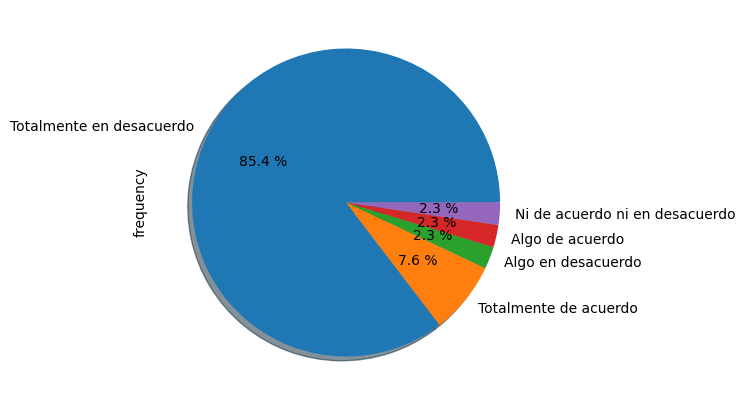

,312_payment_of_utilities,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,151,0.883041,0.883041
1,Totalmente de acuerdo,9,0.052632,0.935673
2,Algo de acuerdo,5,0.029240,0.964912
3,Ni de acuerdo ni en desacuerdo,4,0.023392,0.988304
4,Algo en desacuerdo,2,0.011696,1.000000


,312_payment_of_utilities,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,151,0.883041,0.883041
1,Totalmente de acuerdo,9,0.052632,0.935673
2,Algo de acuerdo,5,0.029240,0.964912
3,Ni de acuerdo ni en desacuerdo,4,0.023392,0.988304
4,Algo en desacuerdo,2,0.011696,1.000000


,frequency,percentage,cumulative_perc
312_payment_of_utilities,,,
Totalmente en desacuerdo,151,0.883041,0.883041
Totalmente de acuerdo,9,0.052632,0.935673
Algo de acuerdo,5,0.029240,0.964912
Ni de acuerdo ni en desacuerdo,4,0.023392,0.988304
Algo en desacuerdo,2,0.011696,1.000000


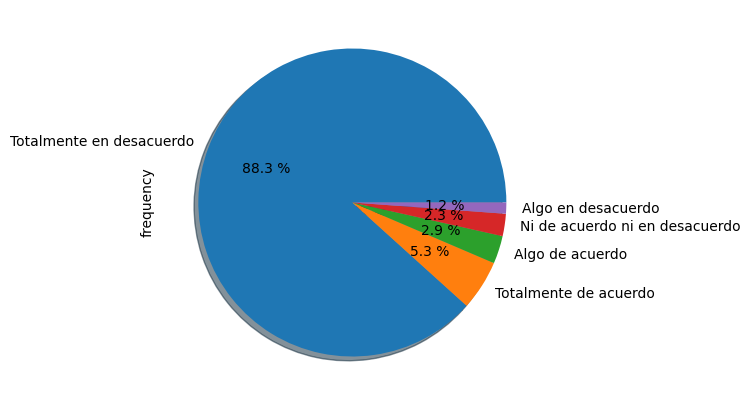

,313_home_deliveries,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,138,0.807018,0.807018
1,Totalmente de acuerdo,14,0.081871,0.888889
2,Algo de acuerdo,11,0.064327,0.953216
3,Algo en desacuerdo,5,0.029240,0.982456
4,Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


,313_home_deliveries,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,138,0.807018,0.807018
1,Totalmente de acuerdo,14,0.081871,0.888889
2,Algo de acuerdo,11,0.064327,0.953216
3,Algo en desacuerdo,5,0.029240,0.982456
4,Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


,frequency,percentage,cumulative_perc
313_home_deliveries,,,
Totalmente en desacuerdo,138,0.807018,0.807018
Totalmente de acuerdo,14,0.081871,0.888889
Algo de acuerdo,11,0.064327,0.953216
Algo en desacuerdo,5,0.029240,0.982456
Ni de acuerdo ni en desacuerdo,3,0.017544,1.000000


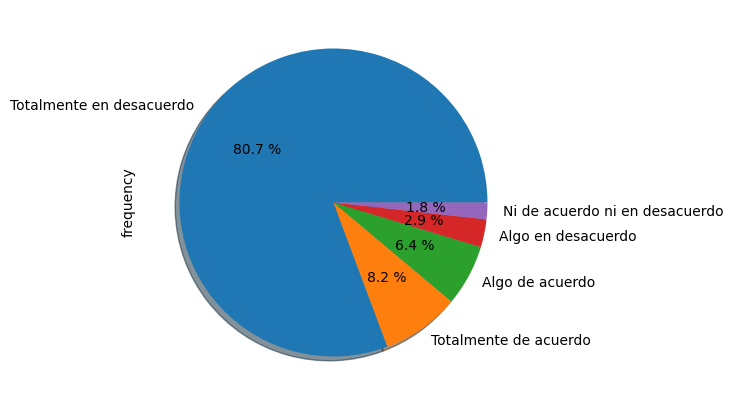

,314_reception_delivery_packages,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,149,0.871345,0.871345
1,Algo de acuerdo,9,0.052632,0.923977
2,Totalmente de acuerdo,8,0.046784,0.970760
3,Ni de acuerdo ni en desacuerdo,3,0.017544,0.988304
4,Algo en desacuerdo,2,0.011696,1.000000


,314_reception_delivery_packages,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,149,0.871345,0.871345
1,Algo de acuerdo,9,0.052632,0.923977
2,Totalmente de acuerdo,8,0.046784,0.970760
3,Ni de acuerdo ni en desacuerdo,3,0.017544,0.988304
4,Algo en desacuerdo,2,0.011696,1.000000


,frequency,percentage,cumulative_perc
314_reception_delivery_packages,,,
Totalmente en desacuerdo,149,0.871345,0.871345
Algo de acuerdo,9,0.052632,0.923977
Totalmente de acuerdo,8,0.046784,0.970760
Ni de acuerdo ni en desacuerdo,3,0.017544,0.988304
Algo en desacuerdo,2,0.011696,1.000000


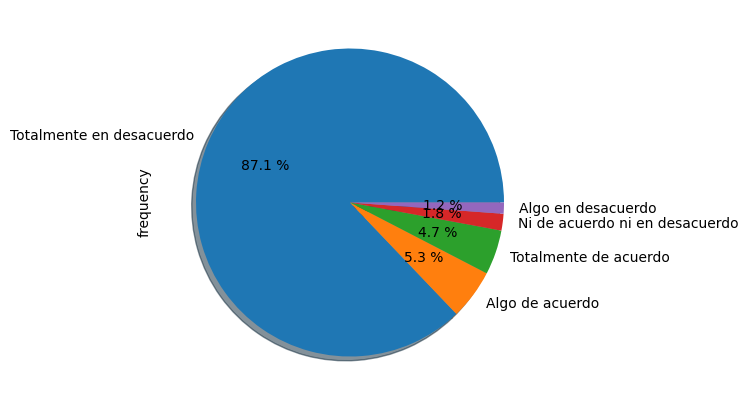

,42_willingness_share_inventory_data_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,140,0.818713,0.818713
1,Algo de acuerdo,13,0.076023,0.894737
2,Algo en desacuerdo,8,0.046784,0.941520
3,Ni de acuerdo ni en desacuerdo,6,0.035088,0.976608
4,Totalmente de acuerdo,4,0.023392,1.000000


,42_willingness_share_inventory_data_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,140,0.818713,0.818713
1,Algo de acuerdo,13,0.076023,0.894737
2,Algo en desacuerdo,8,0.046784,0.941520
3,Ni de acuerdo ni en desacuerdo,6,0.035088,0.976608
4,Totalmente de acuerdo,4,0.023392,1.000000


,frequency,percentage,cumulative_perc
42_willingness_share_inventory_data_suppliers,,,
Totalmente en desacuerdo,140,0.818713,0.818713
Algo de acuerdo,13,0.076023,0.894737
Algo en desacuerdo,8,0.046784,0.941520
Ni de acuerdo ni en desacuerdo,6,0.035088,0.976608
Totalmente de acuerdo,4,0.023392,1.000000


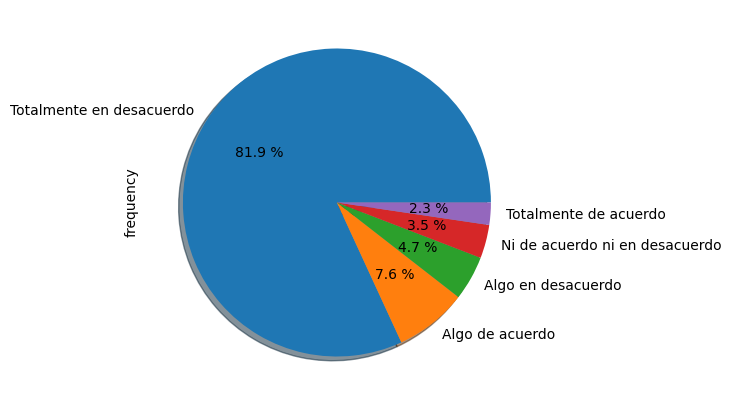

,44_willingness_inventory_management_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,150,0.877193,0.877193
1,Algo en desacuerdo,8,0.046784,0.923977
2,Ni de acuerdo ni en desacuerdo,5,0.029240,0.953216
3,Algo de acuerdo,5,0.029240,0.982456
4,Totalmente de acuerdo,3,0.017544,1.000000


,44_willingness_inventory_management_suppliers,frequency,percentage,cumulative_perc
0,Totalmente en desacuerdo,150,0.877193,0.877193
1,Algo en desacuerdo,8,0.046784,0.923977
2,Ni de acuerdo ni en desacuerdo,5,0.029240,0.953216
3,Algo de acuerdo,5,0.029240,0.982456
4,Totalmente de acuerdo,3,0.017544,1.000000


,frequency,percentage,cumulative_perc
44_willingness_inventory_management_suppliers,,,
Totalmente en desacuerdo,150,0.877193,0.877193
Algo en desacuerdo,8,0.046784,0.923977
Ni de acuerdo ni en desacuerdo,5,0.029240,0.953216
Algo de acuerdo,5,0.029240,0.982456
Totalmente de acuerdo,3,0.017544,1.000000


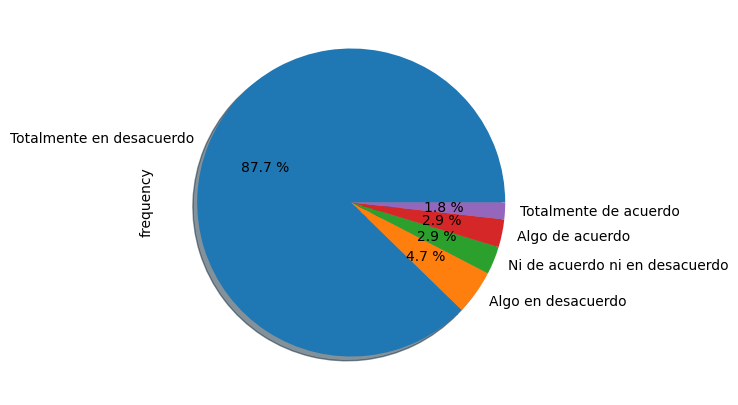

,28_prefered_payment_method,frequency,percentage,cumulative_perc
0,Efectivo,170,0.994152,0.994152
1,Tarjeta de débito y/o crédito,1,0.005848,1.000000


,28_prefered_payment_method,frequency,percentage,cumulative_perc
0,Efectivo,170,0.994152,0.994152


,frequency,percentage,cumulative_perc
28_prefered_payment_method,,,
Efectivo,170,0.994152,0.994152


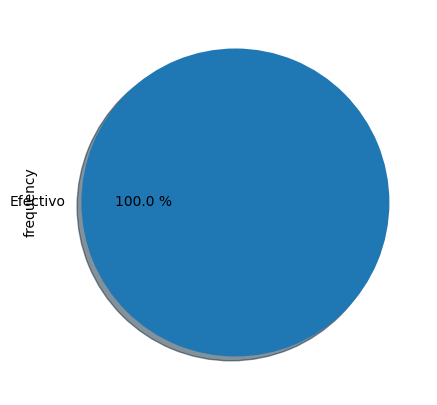

In [22]:
variables = ['311_topups','312_payment_of_utilities','313_home_deliveries','314_reception_delivery_packages',
             '42_willingness_share_inventory_data_suppliers','44_willingness_inventory_management_suppliers',
            '28_prefered_payment_method']

cont = 1

for catg in variables:
    
    table1= freq_tbl(Micro_Retailer[catg])
    display(table1)
    Filtro= table1[table1['frequency']>1]
    display(Filtro)
    Filtro_index= Filtro.set_index(catg)
    display(Filtro_index)
    Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
    plt.show()

In [23]:
#variables = ['232_type_of_store','184_store_devices','5_change_store_space_last_year',
#             '6_change_employees_average_salary_last_year','49_inventory_records','18_sales_records',
#             '155_sales_registers_used_for','210_sales_channels','189_payment_methods','28_prefered_payment_method',
#             '214_customer_relationship_tools','193_sales_planning_tools','60_services','69_why_not_services',
#             '311_topups','312_payment_of_utilities','313_home_deliveries','314_reception_delivery_packages',
#             '42_willingness_share_inventory_data_suppliers','44_willingness_inventory_management_suppliers']